** Ex3.2 of ESLR:** `Suppose the true model is,` $$Y = 1 + 0.3x - 0.2x^2 + 0.4x^3  + \varepsilon, \varepsilon \sim Gaussian(0,8),$$
`We shall compare two methods for constructing confidence interval. Details please refer to ESLR.`

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model
from scipy import stats

In [2]:
## Generating training samples
N = 50
x = np.random.uniform(-4,4, size=N)
Xtr = np.vstack((np.ones(N),x,x**2,x**3)).T # (50, 4) with 1st col - 1
eps = np.random.normal(0,8,size=N)
ytr = 1 + .3*x - .2*x**2 + .4*x**3 + eps

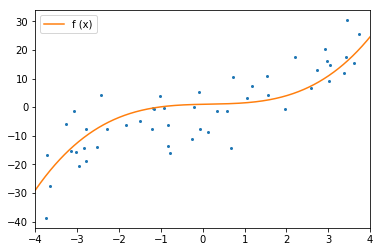

In [4]:
plt.scatter(x,ytr, s=4)
x0 = np.linspace(-4,4, 1000)
y0 = 1 + .3*x0 - .2*x0**2 + .4*x0**3
plt.plot(x0, y0, c='C1', label='f (x)')
plt.xlim(-4,4)
plt.legend()
plt.show()

In [6]:
# Create linear regression object
regr = linear_model.LinearRegression(fit_intercept=False)
# fit by training data
regr.fit(Xtr, ytr)
# coefs
coef_ = regr.coef_
# est of sigma
y_pred = regr.predict(Xtr)
sig_ = np.sqrt( np.sum((y_pred - ytr) ** 2) / (N-1) )

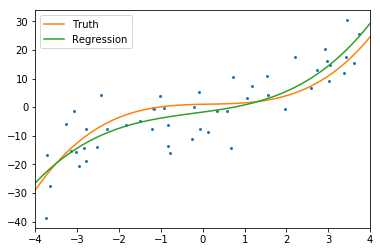

In [7]:
plt.scatter(x,ytr, s=4)
x0 = np.linspace(-4,4, 100)
y0 = 1 + .3*x0 - .2*x0**2 + .4*x0**3
y1 = coef_[0] + coef_[1] * x0 + coef_[2] * x0**2 + coef_[3] * x0**3
plt.plot(x0, y0, c='C1', label='Truth')
plt.plot(x0, y1, c='C2', label='Regression')
plt.legend()
plt.xlim(-4,4)
plt.show()

`Construct the confidence interval of f(x)`

In [8]:
inv = np.linalg.inv(np.dot(Xtr.T, Xtr))

up_ = np.ones_like(y1)
lw_ = np.ones_like(y1)

Xte = np.vstack((np.ones(100),x0,x0**2,x0**3)).T
for idx in range(len(Xte)):
    sd = sig_ * np.sqrt( np.dot(np.dot(Xte[idx], inv), Xte[idx]) )
    up_[idx] = y1[idx] + stats.t.ppf(.975, (N-4-1)) * sd
    lw_[idx] = y1[idx] - stats.t.ppf(.975, (N-4-1)) * sd

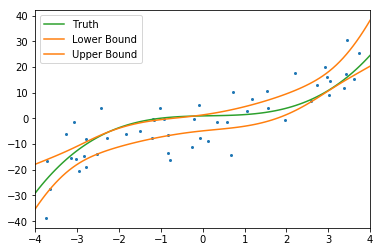

In [9]:
plt.scatter(x,ytr, s=4)
x0 = np.linspace(-4,4, 100)
y0 = 1 + .3*x0 - .2*x0**2 + .4*x0**3
plt.plot(x0, y0, c='C2', label='Truth') #regression model
plt.plot(x0, lw_, c='C1', label='Lower Bound')
plt.plot(x0, up_, c='C1', label='Upper Bound')
plt.legend()
plt.xlim(-4,4)
plt.show()

**Question 1:** `How to understand the confidence level` $1 - \alpha$ = 95% `here? (Key points: Not simultaneous, randomness comes from training samples)`

**Question 2:** `Why there are so many points out of interval? (Key points: irreducible error)` 

`Another way to construct confidence interval`

In [10]:
cho = np.linalg.cholesky(np.dot(Xtr.T, Xtr))
cho_inv = np.linalg.inv(cho)

In [11]:
s2_up_ = np.ones_like(y1)
s2_lw_ = np.ones_like(y1)
for idx in range(len(Xte)):
    rad = np.linalg.norm(np.dot(cho_inv, Xte[idx]), ord=2) * sig_ * np.sqrt(stats.chi2.ppf(.975, 4))
    s2_up_[idx] = y1[idx] + rad
    s2_lw_[idx] = y1[idx] - rad

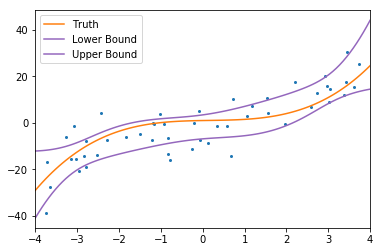

In [17]:
plt.scatter(x,ytr, s=4)
x0 = np.linspace(-4,4, 100)
y0 = 1 + .3*x0 - .2*x0**2 + .4*x0**3
plt.plot(x0, y0, c='C1', label='Truth') #regression model
plt.plot(x0, s2_lw_, c='C4', label='Lower Bound')
plt.plot(x0, s2_up_, c='C4', label='Upper Bound')
plt.legend()
plt.xlim(-4,4)
plt.show()

** Question 3:** `What the difference between these two confidence intervals? (Key points: Simultaneous)`

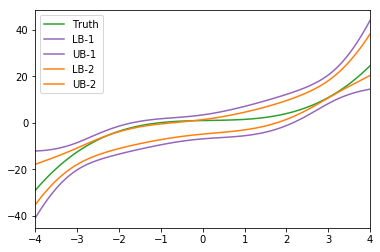

In [19]:
#plt.scatter(x,ytr, s=4)
x0 = np.linspace(-4,4, 100)
y0 = 1 + .3*x0 - .2*x0**2 + .4*x0**3
plt.plot(x0, y0, c='C2', label='Truth') #regression model
plt.plot(x0, s2_lw_, c='C4', label='LB-2')
plt.plot(x0, s2_up_, c='C4', label='UB-2')
plt.plot(x0, lw_, c='C1', label='LB-1')
plt.plot(x0, up_, c='C1', label='UB-1')
plt.legend()
plt.xlim(-4,4)
plt.show()

**Questions 4:** `Do you think it make sense that Interval-2 is larger than Interval-1?`